### NWB file: KatoEtAl2018.WT_Stim.0.nwb

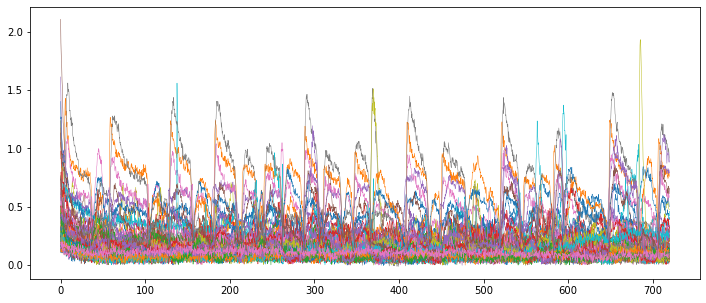

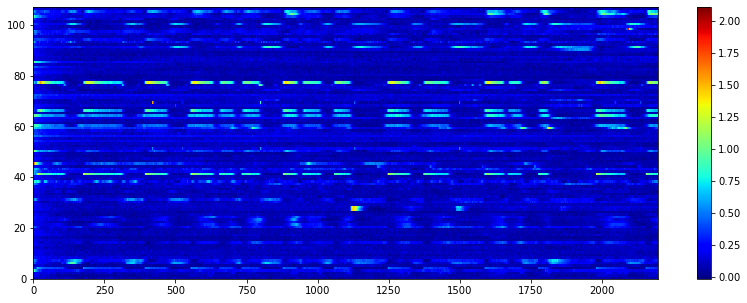

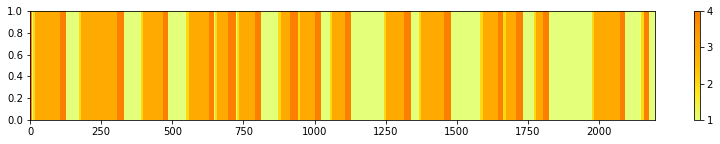

States: Vector of different state types: ‘FWD’ forward crawling; ‘REV’ reverse crawling; ‘REVSUS’ sustained reverse crawling; ‘TURN’ post reversal turn


### NWB file: KatoEtAl2018.WT_Stim.1.nwb

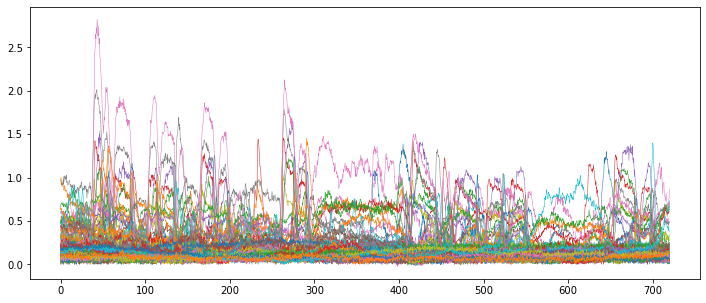

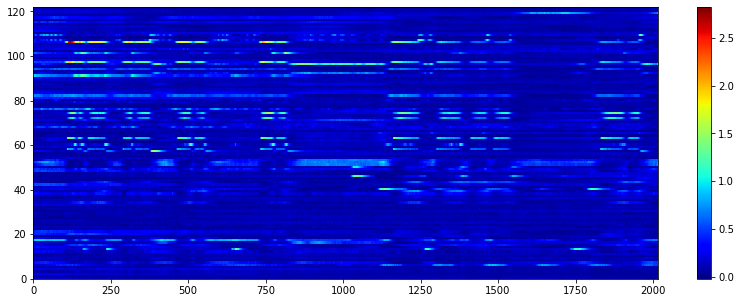

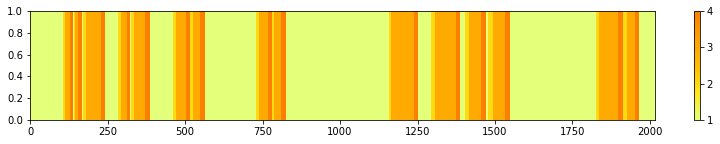

States: Vector of different state types: ‘FWD’ forward crawling; ‘REV’ reverse crawling; ‘REVSUS’ sustained reverse crawling; ‘TURN’ post reversal turn


### NWB file: KatoEtAl2018.WT_Stim.2.nwb

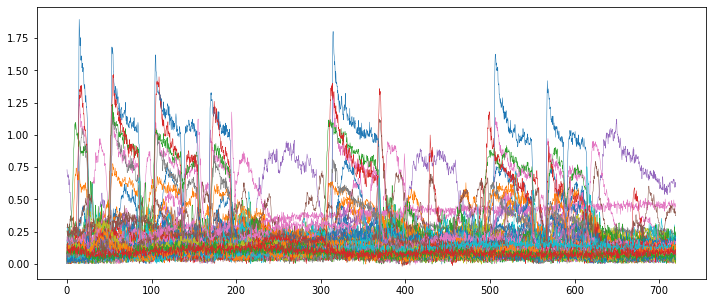

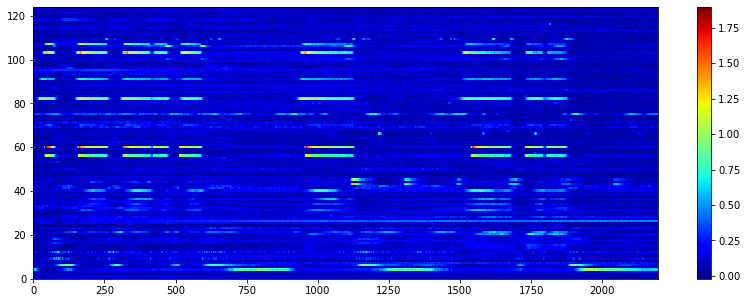

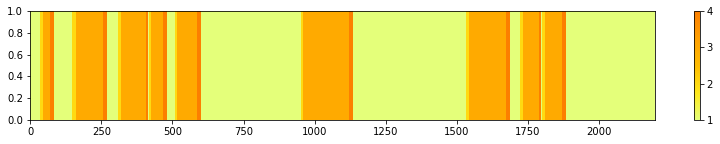

States: Vector of different state types: ‘FWD’ forward crawling; ‘REV’ reverse crawling; ‘REVSUS’ sustained reverse crawling; ‘TURN’ post reversal turn


### NWB file: KatoEtAl2018.WT_Stim.3.nwb

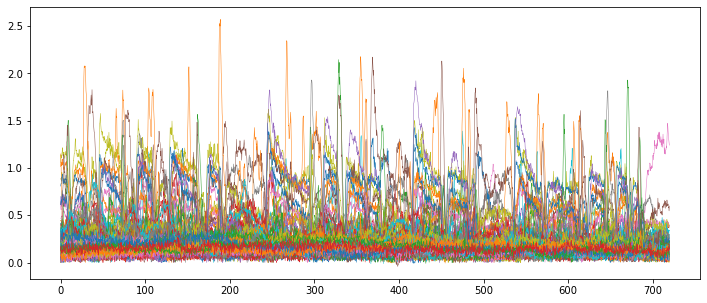

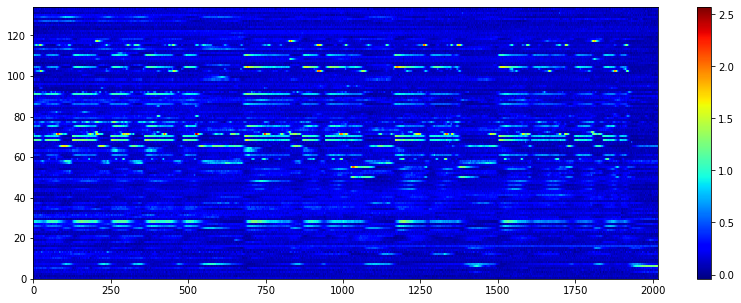

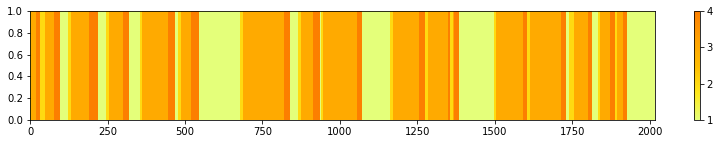

States: Vector of different state types: ‘FWD’ forward crawling; ‘REV’ reverse crawling; ‘REVSUS’ sustained reverse crawling; ‘TURN’ post reversal turn


### NWB file: KatoEtAl2018.WT_Stim.4.nwb

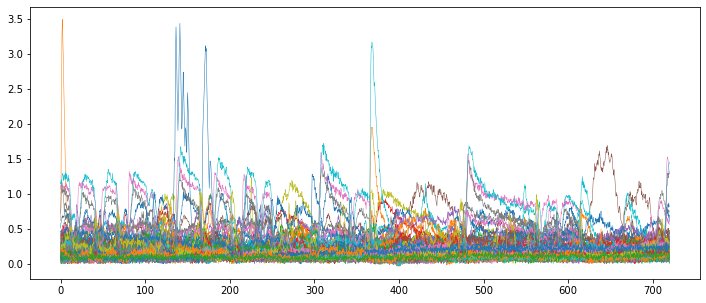

States: Vector of different state types: ‘FWD’ forward crawling; ‘REV’ reverse crawling; ‘REVSUS’ sustained reverse crawling; ‘TURN’ post reversal turn


### NWB file: KatoEtAl2018.WT_Stim.5.nwb

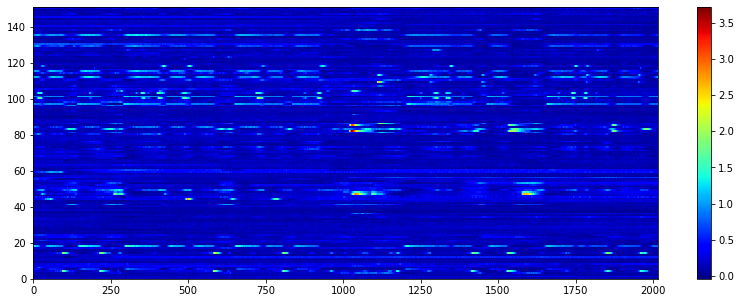

States: Vector of different state types: ‘FWD’ forward crawling; ‘REV’ reverse crawling; ‘REVSUS’ sustained reverse crawling; ‘TURN’ post reversal turn


### NWB file: KatoEtAl2018.WT_Stim.6.nwb

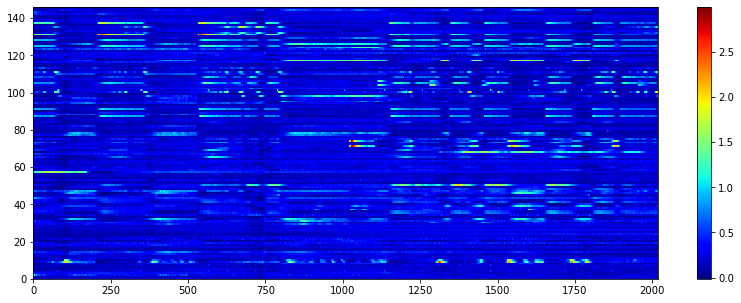

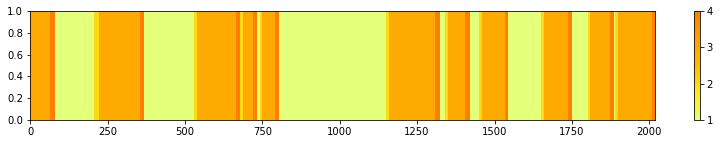

States: Vector of different state types: ‘FWD’ forward crawling; ‘REV’ reverse crawling; ‘REVSUS’ sustained reverse crawling; ‘TURN’ post reversal turn


### NWB file: KatoEtAl2018.WT_NoStim.0.nwb

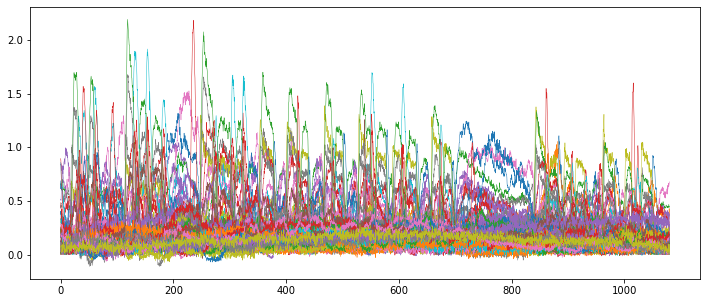

States: Vector of different state types: ‘FWD’ forward crawling; ‘SLOW’ forward slowing; ‘DT’ dorsal post reversal turn; ‘VT’ ventral post reversal turn; ‘REV1’ reverse crawling;; ‘REV2’ reverse crawling; ‘REVSUS’ sustained reverse crawling; ‘NOSTATE’ - ambiguous


### NWB file: KatoEtAl2018.WT_NoStim.1.nwb

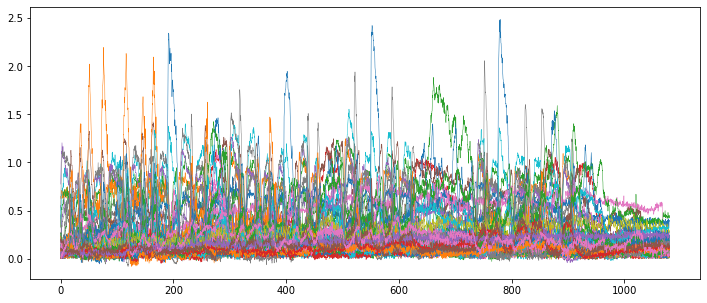

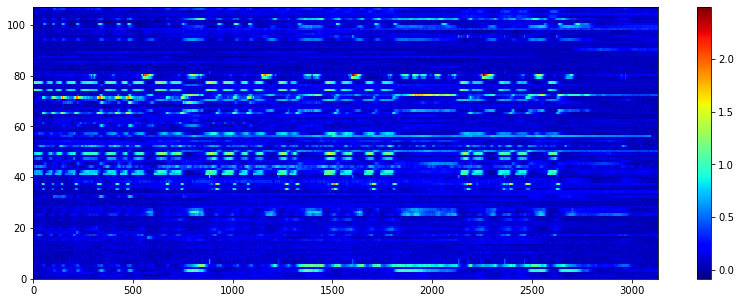

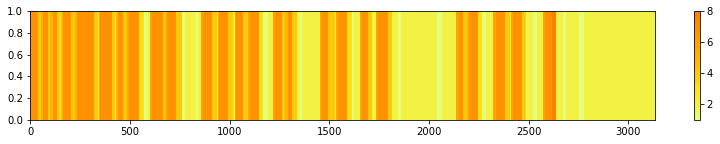

States: Vector of different state types: ‘FWD’ forward crawling; ‘SLOW’ forward slowing; ‘DT’ dorsal post reversal turn; ‘VT’ ventral post reversal turn; ‘REV1’ reverse crawling;; ‘REV2’ reverse crawling; ‘REVSUS’ sustained reverse crawling; ‘NOSTATE’ - ambiguous


### NWB file: KatoEtAl2018.WT_NoStim.2.nwb

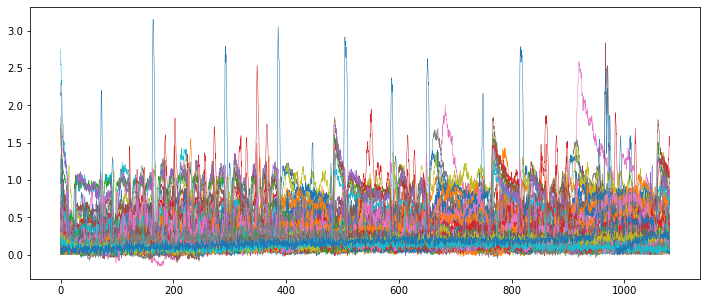

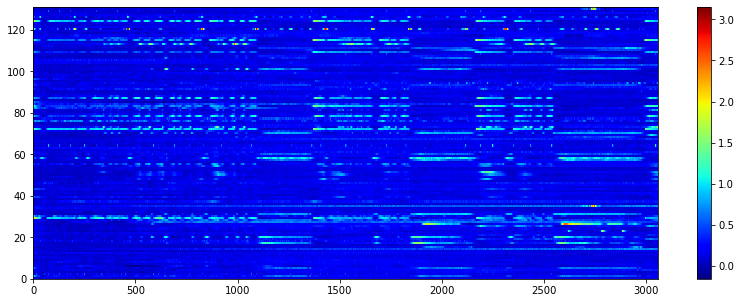

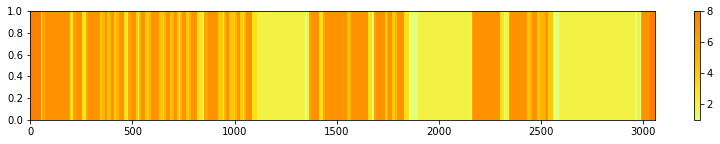

States: Vector of different state types: ‘FWD’ forward crawling; ‘SLOW’ forward slowing; ‘DT’ dorsal post reversal turn; ‘VT’ ventral post reversal turn; ‘REV1’ reverse crawling;; ‘REV2’ reverse crawling; ‘REVSUS’ sustained reverse crawling; ‘NOSTATE’ - ambiguous


### NWB file: KatoEtAl2018.WT_NoStim.3.nwb

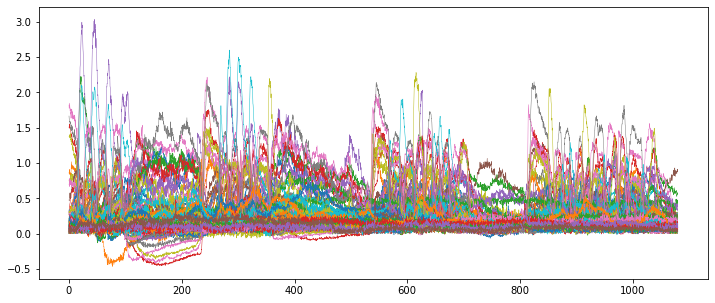

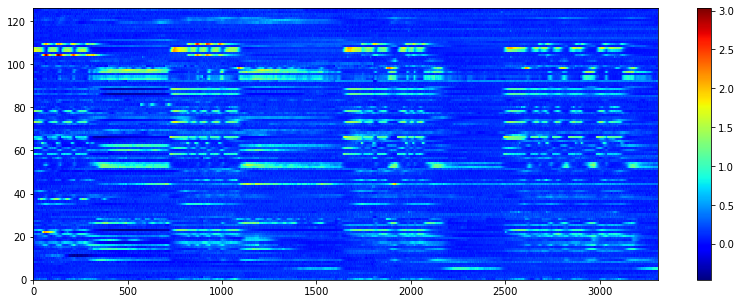

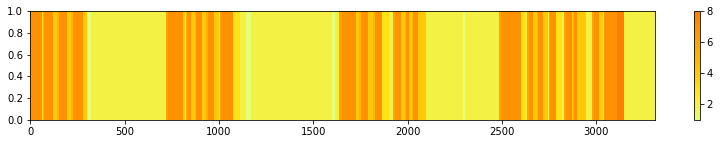

States: Vector of different state types: ‘FWD’ forward crawling; ‘SLOW’ forward slowing; ‘DT’ dorsal post reversal turn; ‘VT’ ventral post reversal turn; ‘REV1’ reverse crawling;; ‘REV2’ reverse crawling; ‘REVSUS’ sustained reverse crawling; ‘NOSTATE’ - ambiguous


### NWB file: KatoEtAl2018.WT_NoStim.4.nwb

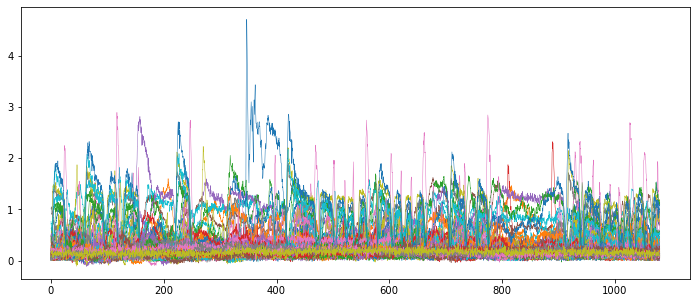

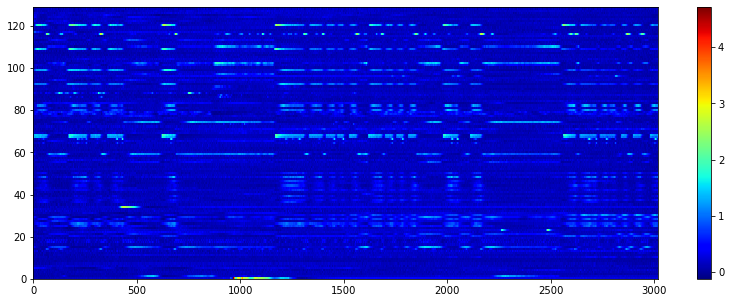

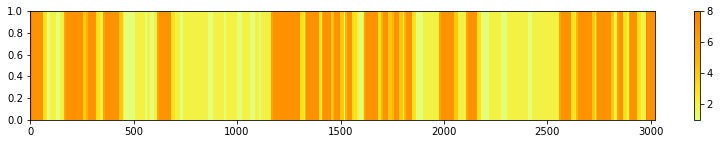

States: Vector of different state types: ‘FWD’ forward crawling; ‘SLOW’ forward slowing; ‘DT’ dorsal post reversal turn; ‘VT’ ventral post reversal turn; ‘REV1’ reverse crawling;; ‘REV2’ reverse crawling; ‘REVSUS’ sustained reverse crawling; ‘NOSTATE’ - ambiguous


### NWB file: KatoEtAl2018.AVA_HisCl.0.nwb

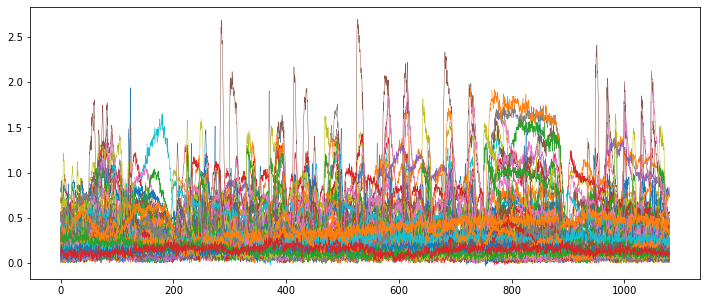

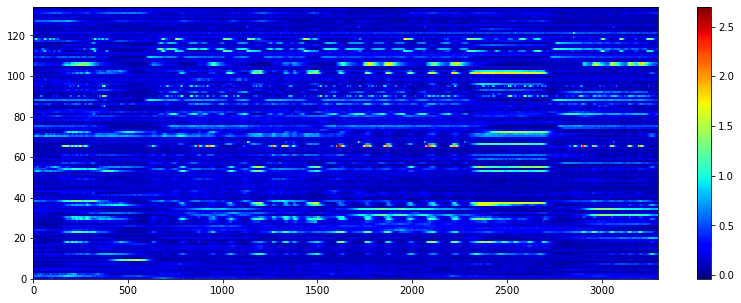

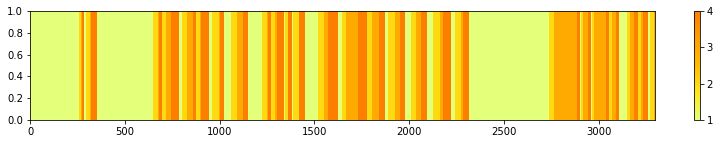

States: Vector of different state types: ‘FWD’ forward crawling; ‘REV’ reverse crawling; ‘REVSUS’ sustained reverse crawling; ‘TURN’ post reversal turn


### NWB file: KatoEtAl2018.AVA_HisCl.1.nwb

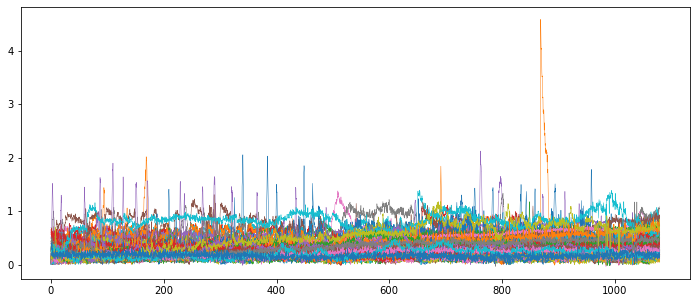

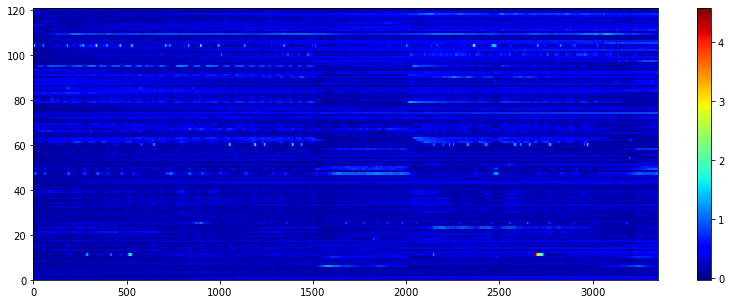

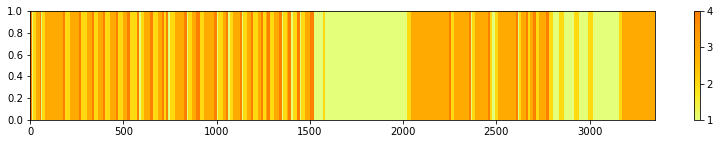

States: Vector of different state types: ‘FWD’ forward crawling; ‘REV’ reverse crawling; ‘REVSUS’ sustained reverse crawling; ‘TURN’ post reversal turn


### NWB file: KatoEtAl2018.AVA_HisCl.2.nwb

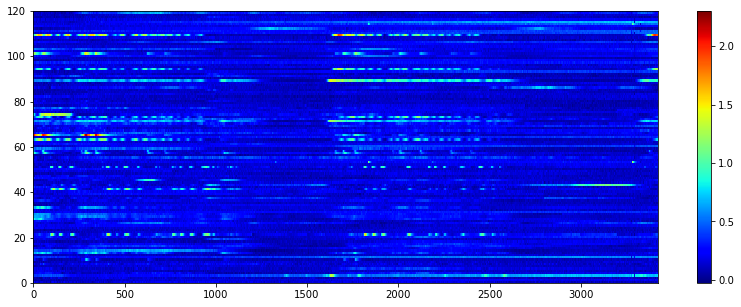

States: Vector of different state types: ‘FWD’ forward crawling; ‘REV’ reverse crawling; ‘REVSUS’ sustained reverse crawling; ‘TURN’ post reversal turn


### NWB file: KatoEtAl2018.AVA_HisCl.3.nwb

States: Vector of different state types: ‘FWD’ forward crawling; ‘REV’ reverse crawling; ‘REVSUS’ sustained reverse crawling; ‘TURN’ post reversal turn


### NWB file: KatoEtAl2018.AVA_HisCl.4.nwb

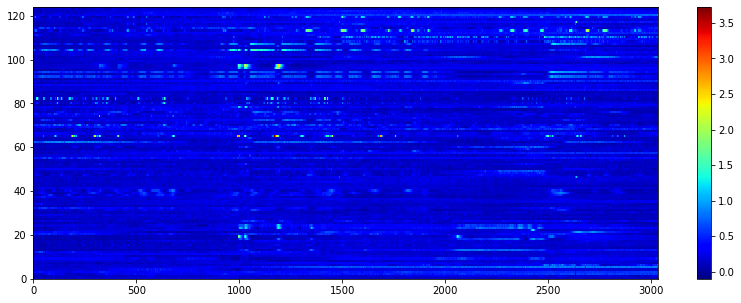

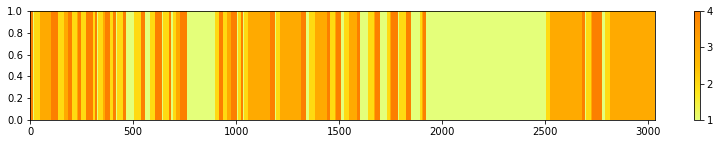

States: Vector of different state types: ‘FWD’ forward crawling; ‘REV’ reverse crawling; ‘REVSUS’ sustained reverse crawling; ‘TURN’ post reversal turn


In [20]:
from pynwb import NWBHDF5IO
from IPython.display import Markdown, display

generate_all = False
generate_all = True
max_points = 10000 

all_files = ['KatoEtAl2018.WT_Stim.%i.nwb'%i for i in range(7 if generate_all else 2)]
if generate_all:
    all_files.extend(['KatoEtAl2018.WT_NoStim.%i.nwb'%i for i in range(5)])
    all_files.extend(['KatoEtAl2018.AVA_HisCl.%i.nwb'%i for i in range(5)])

for test_file in all_files:
    nwbfile_io = NWBHDF5IO(test_file, 'r')
    nwbfile = nwbfile_io.read()
    display(Markdown('### NWB file: %s'%test_file))

    import matplotlib.pyplot as plt
    %matplotlib inline  
    import numpy

    import sys
    sys.path.append("../NWB")
    import nwb_info
    figsizeA=(12, 5)
    figsizeB=(14, 5)
    figsizeC=(14, 2)
    
    tr_fig, tr_ax = plt.subplots(figsize=figsizeA)
    all_traces = None

    verbose = False
    for acq in nwbfile.acquisition.values():
        if 'traces corrected' in acq.description and '' in acq.description:
            cell = acq.description.split(': ')[-1]
            ca = acq.data[:max_points]
            times = acq.timestamps[:max_points]
            if verbose:
                print('Time series: %s'%(acq.description))
                nwb_info.array_info(times,'times')
                nwb_info.array_info(ca,'ca')
            tr_ax.plot(times, ca, lw=.5, label='%s'%cell)
            #print(ca)
            if all_traces is None:
                all_traces = numpy.array([ca])
            else:
                all_traces = numpy.concatenate((all_traces,[ca]), axis=0)

    hm_fig, hm_ax = plt.subplots(figsize=figsizeB)
    im = hm_ax.pcolormesh(all_traces, cmap='jet')
    hm_fig.colorbar(im, ax=hm_ax)
    
    
    st_fig, st_ax = plt.subplots(figsize=figsizeC)
    for acq in nwbfile.acquisition.values():
        if 'States' in acq.name:
            state_desc = acq.description
            st = acq.data[:max_points]
            times = acq.timestamps[:max_points]
            all_traces = numpy.array([st])
            im = st_ax.pcolormesh(all_traces, cmap='Wistia')
    st_fig.colorbar(im, ax=st_ax)
    
    plt.show()
    print('States: %s'%(state_desc))